In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential

In [17]:
from icangetyoursmile.utils import create_train_val_dataset
from icangetyoursmile.models import unet, create_data_augmentation_model

In [4]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data/"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/'

In [5]:
X_train, X_val, y_train, y_val = create_train_val_dataset(path)

Found 10000 files belonging to 1 classes.
Using 8000 files for training.
Found 10000 files belonging to 1 classes.
Using 2000 files for validation.


2022-03-01 11:59:53.541348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-01 11:59:53.541392: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-01 11:59:53.541416: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-01 11:59:53.541763: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 10000 files belonging to 1 classes.
Using 8000 files for training.
Found 10000 files belonging to 1 classes.
Using 2000 files for validation.


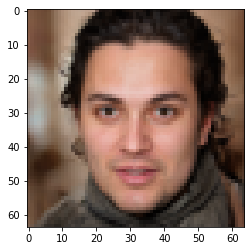

In [8]:
for images in y_train.take(1):
  #for i in range(9):
   # ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[1].numpy().astype("uint8"))

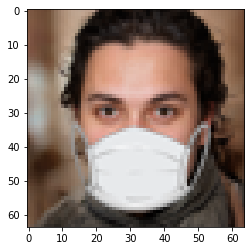

In [9]:
for images in X_train.take(1):
  #for i in range(9):
   # ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[1].numpy().astype("uint8"))

In [29]:
augmentationdata_model = create_data_augmentation_model()
unet_model = unet()

In [30]:
model = Sequential([
#    augmentationdata_model,
    unet_model
])

In [31]:
unet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_72 (Conv2D)             (None, 64, 64, 8)    224         ['input_4[0][0]']                
                                                                                                  
 conv2d_73 (Conv2D)             (None, 64, 64, 8)    584         ['conv2d_72[0][0]']              
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 32, 32, 8)   0           ['conv2d_73[0][0]']              
 )                                                                                          

                                                                  'conv2d_91[0][0]']              
                                                                                                  
 conv2d_92 (Conv2D)             (None, 64, 64, 8)    1160        ['concatenate_15[0][0]']         
                                                                                                  
 conv2d_93 (Conv2D)             (None, 64, 64, 8)    584         ['conv2d_92[0][0]']              
                                                                                                  
 conv2d_94 (Conv2D)             (None, 64, 64, 3)    27          ['conv2d_93[0][0]']              
                                                                                                  
Total params: 485,835
Trainable params: 485,835
Non-trainable params: 0
__________________________________________________________________________________________________


In [38]:
data_set = (X_train, y_train)
data_set

(<BatchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>,
 <BatchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>)

In [40]:
unet_model.fit(X_train, y_train, batch_size=32, epochs=2)


ValueError: `y` argument is not supported when using dataset as input.

In [23]:
model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train)

ValueError: `y` argument is not supported when using dataset as input.